1. Fully Connected Neural Network (FCN) Code

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('WineQT.csv')
X = data.drop(columns=['quality', 'Id'])
y = data['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the FCN model
model_fcn = Sequential()
model_fcn.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_fcn.add(Dense(32, activation='relu'))
model_fcn.add(Dense(16, activation='relu'))
model_fcn.add(Dense(1, activation='linear'))

model_fcn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_fcn = model_fcn.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss_fcn, mae_fcn = model_fcn.evaluate(X_test_scaled, y_test, verbose=0)
print(f"FCN Model - Mean Absolute Error: {mae_fcn:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 25.0175 - mae: 4.8798 - val_loss: 8.4132 - val_mae: 2.6248
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1569 - mae: 2.2872 - val_loss: 4.3792 - val_mae: 1.5979
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0800 - mae: 1.3542 - val_loss: 2.7364 - val_mae: 1.3173
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3648 - mae: 1.2225 - val_loss: 2.2334 - val_mae: 1.2024
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7922 - mae: 1.0678 - val_loss: 1.9528 - val_mae: 1.1138
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5687 - mae: 0.9702 - val_loss: 1.7506 - val_mae: 1.0469
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3418 - mae: 0.9049 - val_loss: 1.6019 - val_mae: 1.0026
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1557 - mae: 0.8587 - val_loss: 1.4046 - val_mae: 0.9368
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1894 - mae: 0.8601 - v

2. Convolutional Neural Network (CNN) Code

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense

# Reshape data for CNN input (samples, timesteps, features)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(16, activation='relu'))
model_cnn.add(Dense(1, activation='linear'))

model_cnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history_cnn = model_cnn.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, y_test), epochs=50, batch_size=32, verbose=1)

# Evaluate the model
loss_cnn, mae_cnn = model_cnn.evaluate(X_test_cnn, y_test, verbose=0)
print(f"CNN Model - Mean Absolute Error: {mae_cnn:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 27.2146 - mae: 5.1196 - val_loss: 6.3736 - val_mae: 2.3077
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1754 - mae: 1.6603 - val_loss: 2.3550 - val_mae: 1.1687
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8989 - mae: 1.0794 - val_loss: 1.8288 - val_mae: 1.0490
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7024 - mae: 0.9837 - val_loss: 1.5037 - val_mae: 0.9526
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2869 - mae: 0.8720 - val_loss: 1.3041 - val_mae: 0.8797
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2186 - mae: 0.8266 - val_loss: 1.0967 - val_mae: 0.8110
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9533 - mae: 0.7557 - val_loss: 0.9070 - val_mae: 0.7472
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8219 - mae: 0.7020 - val_loss: 0.7852 - val_mae: 0.6930
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7112 - mae: 0.6456 - v

3. Comparison Graph

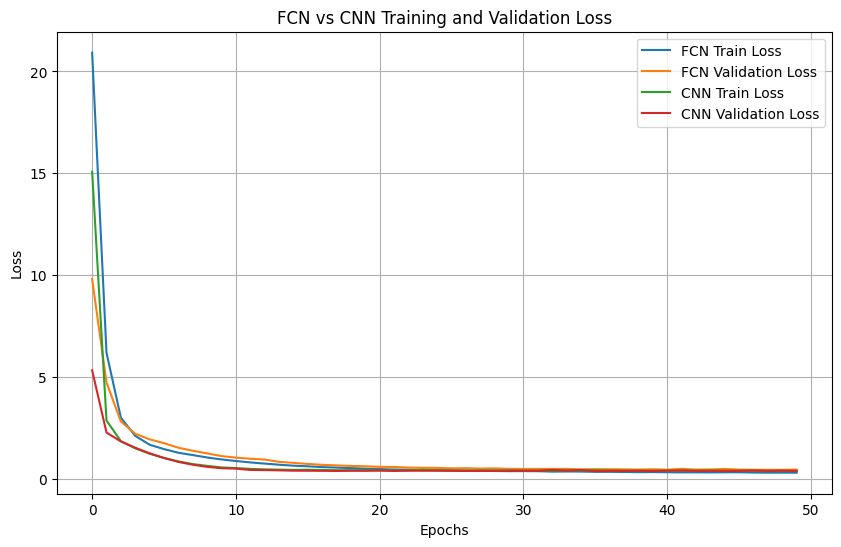

In [ ]:
# Plot training and validation losses for FCN and CNN
plt.figure(figsize=(10, 6))

# Plot FCN Losses
plt.plot(history_fcn.history['loss'], label='FCN Train Loss')
plt.plot(history_fcn.history['val_loss'], label='FCN Validation Loss')

# Plot CNN Losses
plt.plot(history_cnn.history['loss'], label='CNN Train Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')

# Add labels and title
plt.title('FCN vs CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
